In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리
import warnings

warnings.filterwarnings("ignore")

In [4]:
# 데이터 업로드
customer_data = pd.read_csv('./Customer_info.csv')
discount_data = pd.read_csv('./Discount_info.csv')
marketing_data = pd.read_csv('./Marketing_info.csv')
onlinesales_data = pd.read_csv('./Onlinesales_info.csv')
tax_data = pd.read_csv('./Tax_info.csv')

In [5]:
# 데이터 확인
customer_data.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [53]:
marketing_data

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [7]:
onlinesales_data.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [8]:
onlinesales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [9]:
onlinesales_data['거래날짜'].max()

'2019-12-31'

In [10]:
onlinesales_data.tail(1)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
52923,USER_0562,Transaction_25060,2019-12-31,Product_0984,Nest-USA,4,80.52,19.99,Clicked


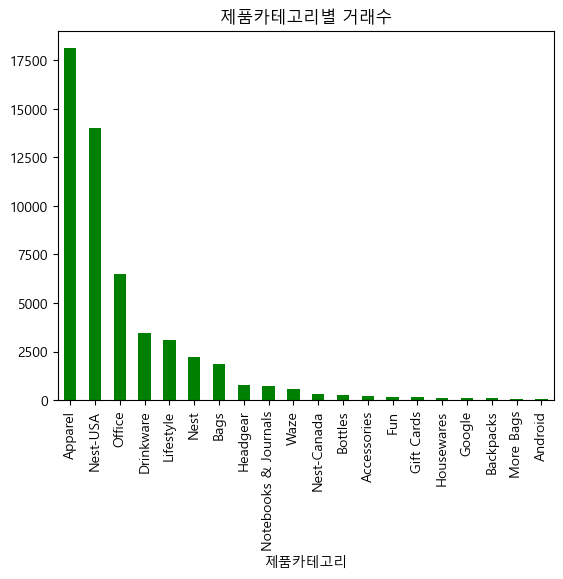

In [84]:
onlinesales_data['제품카테고리'].value_counts().plot(kind='bar', color='green');
plt.title('제품카테고리별 거래수');

In [98]:
# 1. 'Apparel' 카테고리 필터링
apparel_df = onlinesales_data[onlinesales_data['제품카테고리'] == 'Apparel']

# 2. 거래 날짜를 datetime 형식으로 변환
apparel_df['거래날짜'] = pd.to_datetime(apparel_df['거래날짜'])

# 3. 고객별로 거래 날짜를 정렬
apparel_df_sorted = apparel_df.sort_values(by=['고객ID', '거래날짜'])

# 4. 거래 주기 계산
min_date=apparel_df_sorted.groupby('고객ID')['거래날짜'].min()
max_date=apparel_df_sorted.groupby('고객ID')['거래날짜'].max()
diff_date = max_date-min_date

diff_date.mean()

Timedelta('57 days 03:14:49.795918367')

In [88]:
onlinesales_data

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [11]:
# onlinesales data를 통해 활동 고객 파악

# 거래날짜 datetime 변환
onlinesales_data['거래날짜'] = pd.to_datetime(onlinesales_data['거래날짜'])
# 현재일자
latest_date = pd.to_datetime('2020-01-01')

# 고객별로 최신 구매날짜 확인
latest_date_per_customer = onlinesales_data.groupby('고객ID')['거래날짜'].max()

# 현재일자와 차이
diffDays= latest_date - latest_date_per_customer

diffDays

고객ID
USER_0000   108 days
USER_0001    60 days
USER_0002    74 days
USER_0003    18 days
USER_0004   108 days
              ...   
USER_1463   271 days
USER_1464    88 days
USER_1465   195 days
USER_1466    70 days
USER_1467    83 days
Name: 거래날짜, Length: 1468, dtype: timedelta64[ns]

In [12]:
active_customers = diffDays[diffDays<pd.Timedelta(days=90)].index
print(len(active_customers))
# 535명은 최근 90일 전까지 구매한 이력이 있는 활동 고객

535


In [102]:
active_customers

Index(['USER_0001', 'USER_0002', 'USER_0003', 'USER_0007', 'USER_0008',
       'USER_0015', 'USER_0017', 'USER_0019', 'USER_0020', 'USER_0025',
       ...
       'USER_1445', 'USER_1449', 'USER_1450', 'USER_1453', 'USER_1459',
       'USER_1460', 'USER_1461', 'USER_1464', 'USER_1466', 'USER_1467'],
      dtype='object', name='고객ID', length=535)

In [103]:
non_active_customers = diffDays[diffDays>=pd.Timedelta(days=90)].index
print(len(non_active_customers))

933


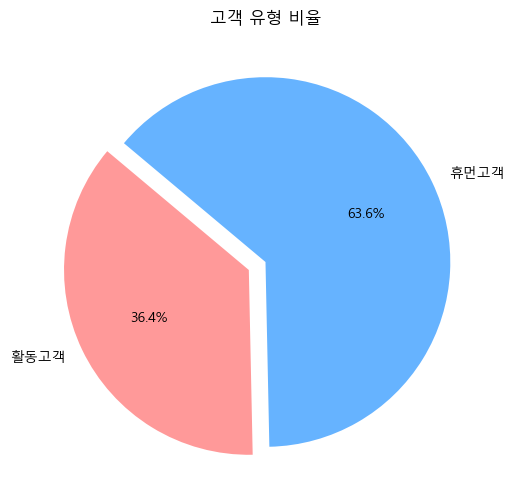

In [114]:
prop_df = pd.DataFrame(data=[len(active_customers), len(non_active_customers)]).T
prop_df=prop_df.rename(columns={0:'활동고객', 1:'휴먼고객'})

# 데이터 정의
labels = ['활동고객', '휴먼고객']
sizes = [535, 933]
colors = ['#ff9999','#66b3ff']  # 색상 정의
explode = (0.1, 0)  # 첫 번째 조각을 강조

# 원형 플롯 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# 플롯 제목
plt.title('고객 유형 비율')

# 플롯 표시
plt.show()

In [125]:
customer_ids = list(non_active_customers.values)

# 데이터프레임에서 고객 ID가 포함된 데이터만 추출
filtered_df = customer_data[customer_data['고객ID'].isin(customer_ids)]
filtered_df

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
7,USER_1347,여,New Jersey,24
...,...,...,...,...
1208,USER_0981,여,California,20
1209,USER_0086,남,Chicago,14
1210,USER_1036,여,New York,11
1211,USER_1202,여,California,31


In [127]:
customer_ids = list(non_active_customers.values)

filtered_df2 = onlinesales_data[onlinesales_data['고객ID'].isin(customer_ids)]
filtered_df2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used
...,...,...,...,...,...,...,...,...,...
40702,USER_1120,Transaction_18191,2019-10-03,Product_0990,Nest,2,199.00,6.0,Clicked
40703,USER_1120,Transaction_18192,2019-10-03,Product_0976,Nest-USA,1,119.00,6.0,Clicked
40704,USER_1120,Transaction_18192,2019-10-03,Product_0983,Nest-USA,1,119.00,6.0,Used
40705,USER_1120,Transaction_18192,2019-10-03,Product_0990,Nest,1,199.00,6.0,Clicked


In [131]:
# 2. 고객별로 거래 날짜를 추출
customer_dates = filtered_df2.groupby('고객ID')['거래날짜'].apply(lambda x: x.dt.date.unique())

# 3. 고객별 거래 일수 계산
customer_transaction_days = customer_dates.apply(len)

# 결과 출력
print(customer_transaction_days)

고객ID
USER_0000    1
USER_0004    1
USER_0005    1
USER_0006    2
USER_0009    4
            ..
USER_1457    2
USER_1458    1
USER_1462    1
USER_1463    1
USER_1465    2
Name: 거래날짜, Length: 933, dtype: int64


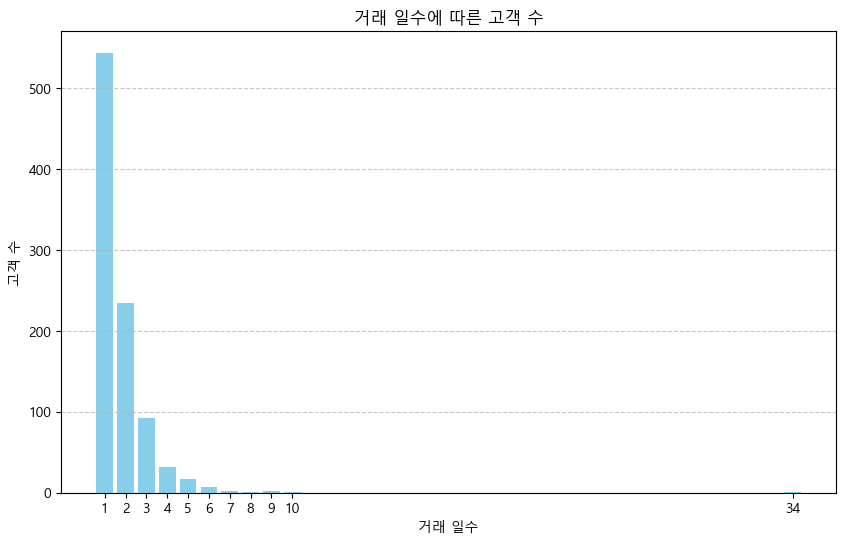

In [132]:
# 거래 일수 빈도 계산
transaction_counts = customer_transaction_days.value_counts().sort_index()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(transaction_counts.index, transaction_counts.values, color='skyblue')
plt.xlabel('거래 일수')
plt.ylabel('고객 수')
plt.title('거래 일수에 따른 고객 수')
plt.xticks(transaction_counts.index)  # X축에 거래 일수 값 표시
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

- 단 1일만 서비스 이용 후 휴먼 계정으로 전환된 사례가 많음. 

In [13]:
# 활성화 고객 RFM 세그멘테이션 분류
rfm_online_sales = onlinesales_data.copy()

active_sales = rfm_online_sales[rfm_online_sales['고객ID'].isin(active_customers)]
active_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
9,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.50,Used
10,USER_0190,Transaction_0003,2019-01-01,Product_0966,Office,31,1.99,6.50,Clicked
11,USER_0190,Transaction_0003,2019-01-01,Product_0970,Office,31,1.99,6.50,Clicked
12,USER_0190,Transaction_0003,2019-01-01,Product_1025,Apparel,5,17.53,6.50,Used
13,USER_0190,Transaction_0004,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Clicked
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [14]:
# Recency 계산
last_date = pd.to_datetime('2020-01-01')
recency_data = active_sales.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data['Recency'] = (last_date-recency_data['거래날짜']).dt.days
recency_data.head()

,고객ID,거래날짜,Recency
0,USER_0001,2019-11-02,60
1,USER_0002,2019-10-19,74
2,USER_0003,2019-12-14,18
3,USER_0007,2019-12-07,25
4,USER_0008,2019-11-21,41


In [15]:
# Frequency 계산
frequency_data = active_sales.groupby('고객ID')['거래ID'].nunique().reset_index()
frequency_data.rename(columns={'거래ID':'Frequency'}, inplace=True)
frequency_data.head()

,고객ID,Frequency
0,USER_0001,31
1,USER_0002,8
2,USER_0003,11
3,USER_0007,5
4,USER_0008,37


In [16]:
# Moneytary 계산
active_sales['PurchasedMoney'] = active_sales['수량'] * active_sales['평균금액']
moneytary_data = active_sales.groupby('고객ID')['PurchasedMoney'].sum().reset_index()
moneytary_data.rename(columns={'PurchasedMoney':'Moneytary'}, inplace=True)
moneytary_data.head()

,고객ID,Moneytary
0,USER_0001,13834.90
1,USER_0002,1442.12
2,USER_0003,1360.07
3,USER_0007,471.58
4,USER_0008,9950.31


In [17]:
# Length 계산
purchase_dates = active_sales.groupby('고객ID')['거래날짜'].agg(['min','max']).reset_index()
purchase_dates['Length'] = (purchase_dates['max'] - purchase_dates['min']).dt.days
purchase_dates.head()

,고객ID,min,max,Length
0,USER_0001,2019-03-24,2019-11-02,223
1,USER_0002,2019-06-22,2019-10-19,119
2,USER_0003,2019-12-14,2019-12-14,0
3,USER_0007,2019-12-07,2019-12-07,0
4,USER_0008,2019-07-05,2019-11-21,139


In [18]:
# RFM 데이터 결합
rfm_data = recency_data.merge(frequency_data, on='고객ID').merge(moneytary_data, on='고객ID').merge(purchase_dates[['고객ID','Length']],on='고객ID')
rfm_data.head()

,고객ID,거래날짜,Recency,Frequency,Moneytary,Length
0,USER_0001,2019-11-02,60,31,13834.90,223
1,USER_0002,2019-10-19,74,8,1442.12,119
2,USER_0003,2019-12-14,18,11,1360.07,0
3,USER_0007,2019-12-07,25,5,471.58,0
4,USER_0008,2019-11-21,41,37,9950.31,139


<Axes: ylabel='Length'>

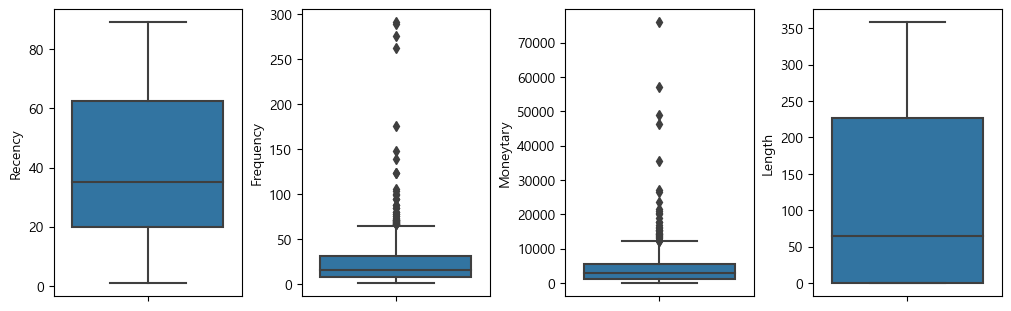

In [19]:
# 데이터 시각화
fig,ax = plt.subplots(1,4,figsize=(10,3), constrained_layout=True)
sns.boxplot(y=rfm_data['Recency'], ax=ax[0])
sns.boxplot(y=rfm_data['Frequency'], ax=ax[1])
sns.boxplot(y=rfm_data['Moneytary'], ax=ax[2])
sns.boxplot(y=rfm_data['Length'], ax=ax[3])

In [20]:
# 경계값을 기준으로 점수 할당 함수 정의
def assign_score(value, boundaries):
    if value <= boundaries[0]:
        return 1
    elif value <= boundaries[1]:
        return 2
    elif value <= boundaries[2]:
        return 3
    elif value <= boundaries[3]:
        return 4
    elif value <= boundaries[4]:
        return 5
    else:
        return 6

def assign_score_2(value, boundaries):
    if value <= boundaries[0]:
        return 6
    elif value <= boundaries[1]:
        return 5
    elif value <= boundaries[2]:
        return 4
    elif value <= boundaries[3]:
        return 3
    elif value <= boundaries[4]:
        return 2
    else:
        return 1

# Recency, Frequency, Monetary, Length 비율 분배
r_boundaries = np.percentile(rfm_data['Recency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
f_boundaries = np.percentile(rfm_data['Frequency'], [2.5, 13.5, 34, 66, 86.5, 97.5])
m_boundaries = np.percentile(rfm_data['Moneytary'], [2.5, 13.5, 34, 66, 86.5, 97.5])
l_boundaries = np.percentile(rfm_data['Length'], [2.5, 13.5, 34, 66, 86.5, 97.5])

# 각 RFM 점수에 대해 점수 할당
rfm_data['R_Score'] = rfm_data['Recency'].apply(lambda x: assign_score_2(x, r_boundaries))
rfm_data['F_Score'] = rfm_data['Frequency'].apply(lambda x: assign_score(x, f_boundaries))
rfm_data['M_Score'] = rfm_data['Moneytary'].apply(lambda x: assign_score(x, m_boundaries))
rfm_data['L_Score'] = rfm_data['Length'].apply(lambda x: assign_score(x, l_boundaries))
# RFM 스코어 계산

rfm_data['RFML_Score'] = rfm_data['R_Score'] + rfm_data['F_Score'] + rfm_data['M_Score'] + rfm_data['L_Score']

print(rfm_data)

          고객ID       거래날짜  Recency  Frequency  Moneytary  Length  R_Score  \
0    USER_0001 2019-11-02       60         31   13834.90     223        2   
1    USER_0002 2019-10-19       74          8    1442.12     119        2   
2    USER_0003 2019-12-14       18         11    1360.07       0        4   
3    USER_0007 2019-12-07       25          5     471.58       0        3   
4    USER_0008 2019-11-21       41         37    9950.31     139        3   
..         ...        ...      ...        ...        ...     ...      ...   
530  USER_1460 2019-11-28       34         30    7692.95     147        3   
531  USER_1461 2019-12-13       19          6    2396.54       0        4   
532  USER_1464 2019-10-05       88         19    2363.05     105        1   
533  USER_1466 2019-10-23       70          1     298.00       0        2   
534  USER_1467 2019-10-10       83         53    6362.77      73        1   

     F_Score  M_Score  L_Score  RFML_Score  
0          5        6        5

In [21]:
# 고객 분류 segmentation
def classify_customer(row):
  r,f,m,l = row['R_Score'], row['F_Score'], row['M_Score'], row['L_Score']

  # VIP
  if r>=5 and f >=5 and m >=5 and l >= 5:
    return 'VIP'

  # VIP 이탈고객
  elif r <= 3 and (f >= 4 and m >= 4 and l >= 4):
    return 'VIP이탈고객'
  elif f >= 4 and l >= 4 and r >= 4 and m >= 4:
    return '충성고객'
  elif f >= 3 and l >= 3 and r >= 3 and m >= 3:
    return '충성예정고객'
  elif r <= 2 and f >= 3 and l >= 3:
    return '충성이탈예정고객'
  else:
    return '일반고객'  # 이외의 경우를 위한 기본값

rfm_data['고객등급'] = rfm_data.apply(classify_customer, axis=1)

print(rfm_data[['고객ID', 'R_Score', 'F_Score', 'M_Score', 'L_Score', '고객등급']].head())

        고객ID  R_Score  F_Score  M_Score  L_Score      고객등급
0  USER_0001        2        5        6        5   VIP이탈고객
1  USER_0002        2        3        3        4  충성이탈예정고객
2  USER_0003        4        4        3        1      일반고객
3  USER_0007        3        2        2        1      일반고객
4  USER_0008        3        5        6        4   VIP이탈고객


In [22]:
import matplotlib.pyplot as plt

customer_grade_counts = rfm_data['고객등급'].value_counts().sort_values(ascending=True)
customer_grade_counts

고객등급
VIP          19
충성이탈예정고객     27
충성예정고객       32
충성고객         73
VIP이탈고객     178
일반고객        206
Name: count, dtype: int64

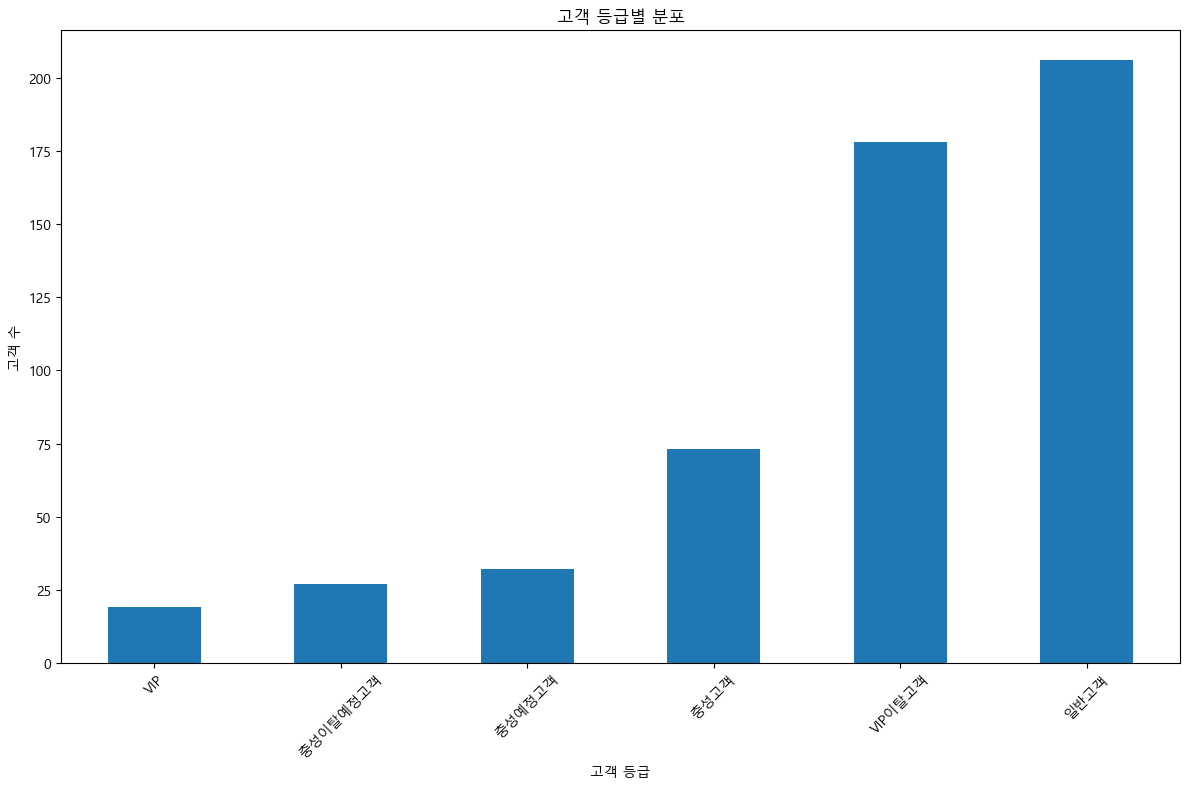

In [133]:
plt.figure(figsize=(12,8))
customer_grade_counts.plot(kind='bar')
plt.title('고객 등급별 분포')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## KMeans

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [25]:
rfm_data

,고객ID,거래날짜,Recency,Frequency,Moneytary,Length,R_Score,F_Score,M_Score,L_Score,RFML_Score,고객등급
0,USER_0001,2019-11-02,60,31,13834.90,223,2,5,6,5,18,VIP이탈고객
1,USER_0002,2019-10-19,74,8,1442.12,119,2,3,3,4,12,충성이탈예정고객
2,USER_0003,2019-12-14,18,11,1360.07,0,4,4,3,1,12,일반고객
3,USER_0007,2019-12-07,25,5,471.58,0,3,2,2,1,8,일반고객
4,USER_0008,2019-11-21,41,37,9950.31,139,3,5,6,4,18,VIP이탈고객
...,...,...,...,...,...,...,...,...,...,...,...,...
530,USER_1460,2019-11-28,34,30,7692.95,147,3,5,5,4,17,VIP이탈고객
531,USER_1461,2019-12-13,19,6,2396.54,0,4,3,4,1,12,일반고객
532,USER_1464,2019-10-05,88,19,2363.05,105,1,4,4,4,13,VIP이탈고객
533,USER_1466,2019-10-23,70,1,298.00,0,2,1,2,1,6,일반고객


In [26]:
cluster = rfm_data.drop(['거래날짜','고객등급','RFML_Score', 'R_Score', 'F_Score', 'M_Score', 'L_Score'], axis = 1)
cluster.set_index("고객ID", inplace=True)
cluster

,Recency,Frequency,Moneytary,Length
고객ID,,,,
USER_0001,60,31,13834.90,223
USER_0002,74,8,1442.12,119
USER_0003,18,11,1360.07,0
USER_0007,25,5,471.58,0
USER_0008,41,37,9950.31,139
...,...,...,...,...
USER_1460,34,30,7692.95,147
USER_1461,19,6,2396.54,0
USER_1464,88,19,2363.05,105


In [27]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, USER_0001 to USER_1467
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    535 non-null    int64  
 1   Frequency  535 non-null    int64  
 2   Moneytary  535 non-null    float64
 3   Length     535 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 20.9+ KB


In [28]:
X= MinMaxScaler().fit_transform(cluster)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

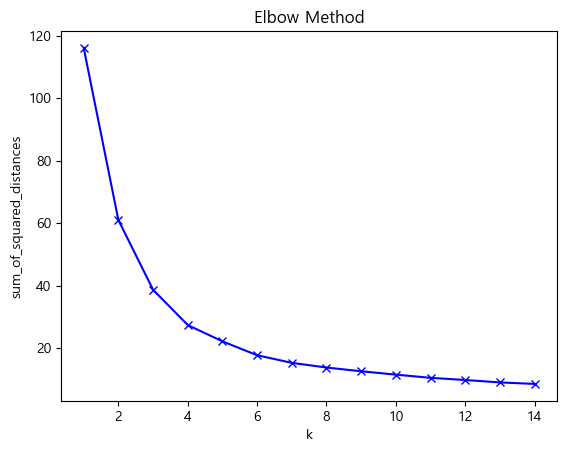

In [29]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

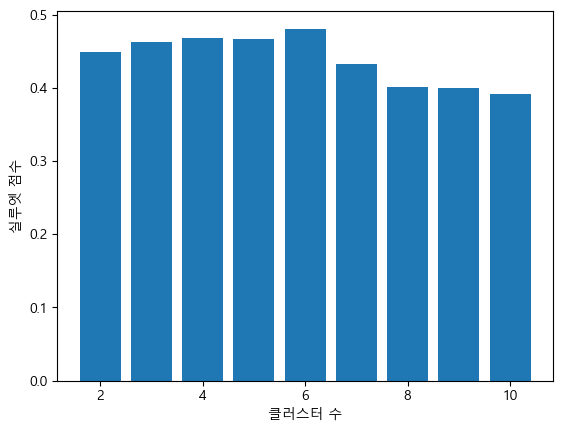

In [30]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X)))

k = [2, 3, 4, 5, 6,7,8,9,10]
plt.bar(k, silhouette_scores)
plt.xlabel('클러스터 수', fontsize = 10)
plt.ylabel('실루엣 점수', fontsize = 10)
plt.show()

In [31]:
k_means = KMeans(n_clusters=6)
model = k_means.fit(X)
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.48175812039968113

In [32]:
cluster['Cluster'] = labels
cluster

,Recency,Frequency,Moneytary,Length,Cluster
고객ID,,,,,
USER_0001,60,31,13834.90,223,4
USER_0002,74,8,1442.12,119,0
USER_0003,18,11,1360.07,0,2
USER_0007,25,5,471.58,0,2
USER_0008,41,37,9950.31,139,3
...,...,...,...,...,...
USER_1460,34,30,7692.95,147,3
USER_1461,19,6,2396.54,0,2
USER_1464,88,19,2363.05,105,0


In [33]:
table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Moneytary': 'mean'})
table['cluster 분류'] = cluster['Cluster'].value_counts()
table

,Recency,Frequency,Moneytary,cluster 분류
Cluster,,,,
0,69.953125,14.898438,2753.478281,128
1,21.642857,37.377551,6961.247755,98
2,22.603896,13.155844,2553.101948,154
3,31.296296,27.827160,5067.682222,81
4,68.838235,31.441176,5325.787941,68
5,15.166667,240.500000,47022.066667,6


<Axes: ylabel='Length'>

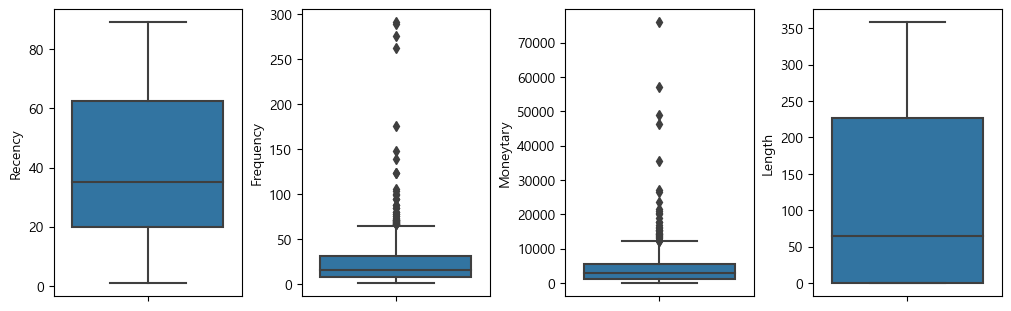

In [55]:
fig,ax = plt.subplots(1,4,figsize=(10,3), constrained_layout=True)
sns.boxplot(y=rfm_data['Recency'], ax=ax[0])
sns.boxplot(y=rfm_data['Frequency'], ax=ax[1])
sns.boxplot(y=rfm_data['Moneytary'], ax=ax[2])
sns.boxplot(y=rfm_data['Length'], ax=ax[3])

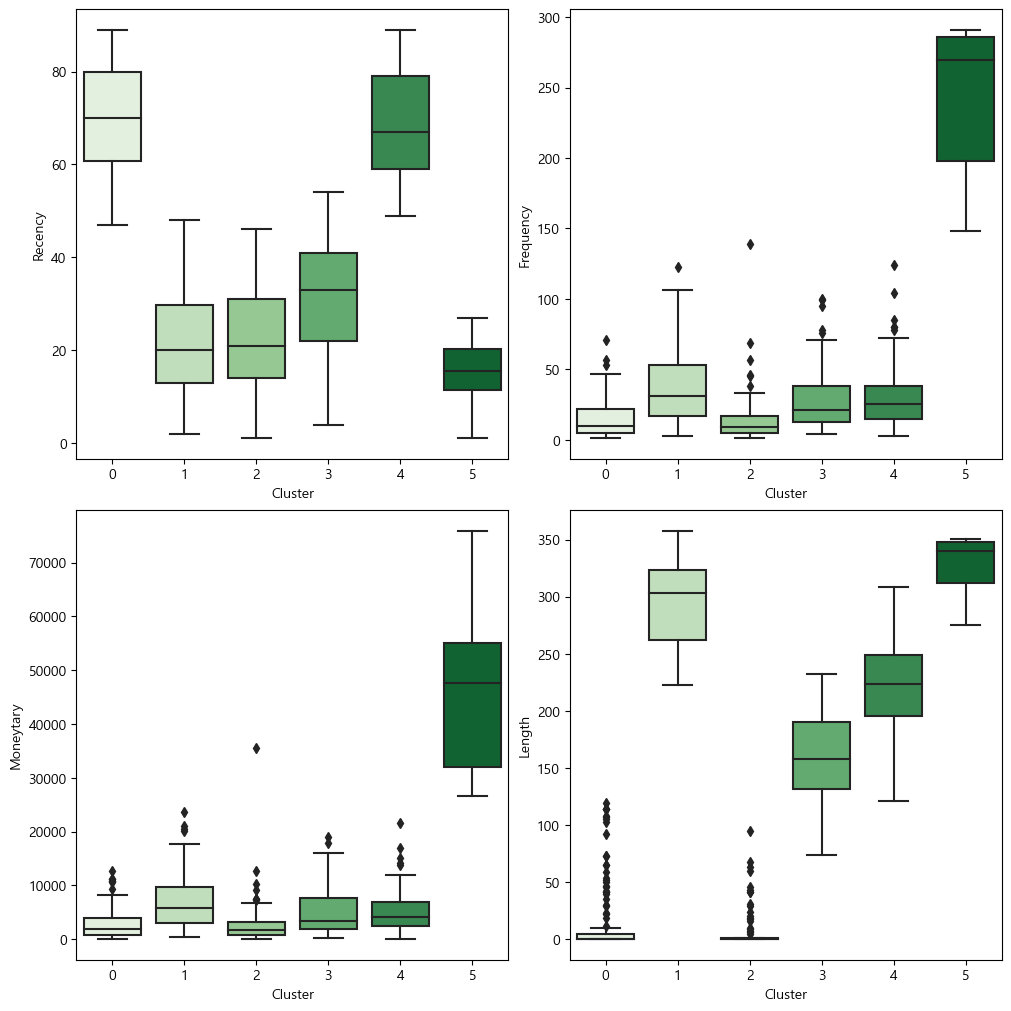

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)

# cluster는 DataFrame이고, 열 이름을 사용하여 boxplot을 그립니다.
for i, c in enumerate(list(cluster.columns[:4])):
    sns.boxplot(y=cluster[c], x=cluster['Cluster'], order=[0, 1, 2, 3, 4, 5], palette='Greens', ax=ax[i // 2, i % 2])

plt.show()

## RandomForest Classifier

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = MinMaxScaler().fit_transform(cluster.drop('Cluster', axis=1))
y = cluster['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# 최적의 모델로 테스트 데이터 세트에 대한 성능 평가
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 0.9627


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 최적의 하이퍼파라미터를 사용하여 모델 초기화
rf_optimized = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features='sqrt',
    random_state=0
)

# 모델 학습
rf_optimized.fit(X_train, y_train)

# 훈련 세트에 대한 성능 평가
y_train_pred = rf_optimized.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.4f}")

# 테스트 세트에 대한 성능 평가
y_test_pred = rf_optimized.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")

Training Set Accuracy: 1.0000
Test Set Accuracy: 0.9627


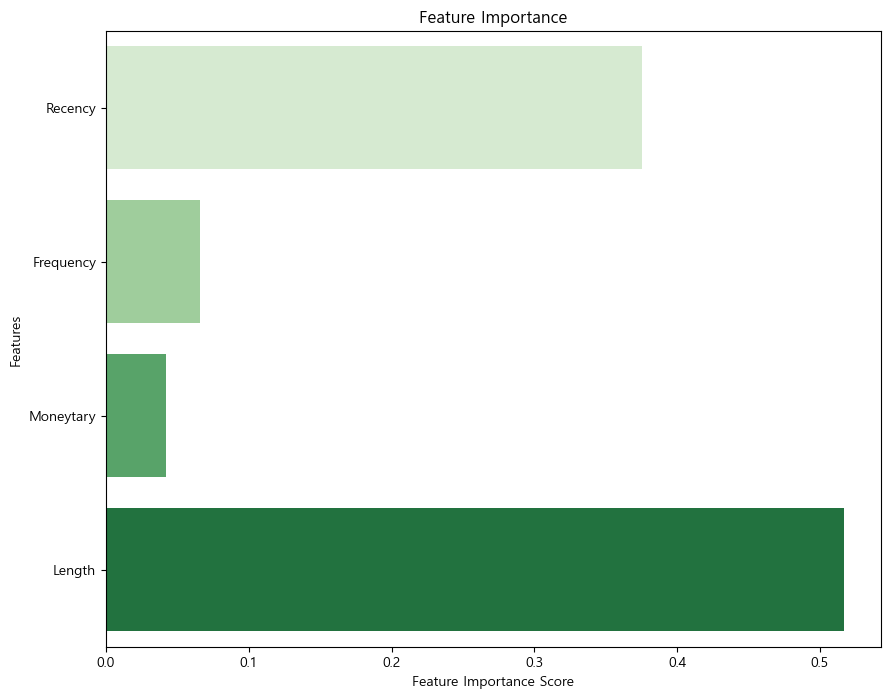

Recency: 0.38
Frequency: 0.07
Moneytary: 0.04
Length: 0.52


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=rf_optimized.feature_importances_, y=cluster.columns[:4], palette='Greens')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# 가중치 계산
feature_importances = rf_optimized.feature_importances_
score = feature_importances / feature_importances.sum()
feature_names = list(cluster.columns)

# 각 특성의 가중치 출력
for feature, importance in zip(feature_names[:4], score):
    print(f'{feature}: {round(importance, 2)}')

In [39]:
# 가중치를 통해 RFML 점수 계산

rfm_data["RFML"] = rfm_data['R_Score'] * score[0]+ rfm_data['F_Score'] * score[1] + rfm_data['M_Score'] * score[2] + rfm_data['L_Score'] * score[3]
rfm_data['RFML'].describe()

count    535.000000
mean       3.326920
std        1.210755
min        1.000000
25%        2.233483
50%        3.516865
75%        4.215923
max        6.000000
Name: RFML, dtype: float64

In [40]:
# 가중치를 통해 나온 RFML 점수로 등급 세분화
def segment(row):
    if row <= 1.5:
        return 'None'
    elif row <= 2:
        return 'Red'
    elif row <= 3:
        return 'Black'
    elif row <= 4:
        return 'Gold'
    elif row <= 5:
        return 'Platinum'
    else:
        return 'Diamond'

In [41]:
rfm_data['가중치고객등급'] = rfm_data['RFML'].apply(segment)
rfm_data['가중치고객등급'].value_counts()

가중치고객등급
Gold        160
Platinum    117
Black       115
Red          51
Diamond      49
None         43
Name: count, dtype: int64

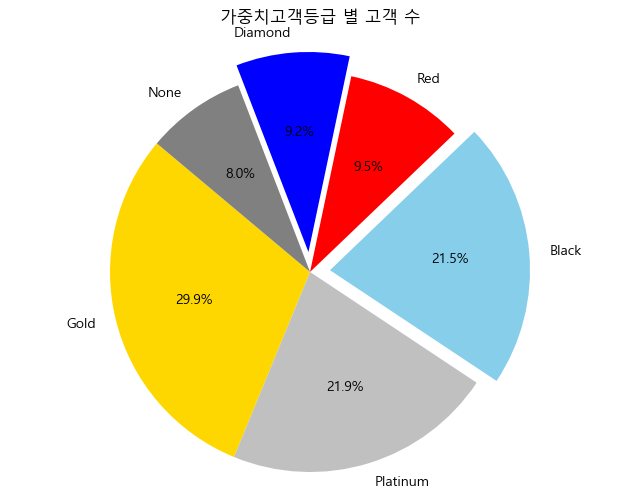

In [42]:
# 각 가중치고객등급 비율
grade_counts = rfm_data['가중치고객등급'].value_counts()
labels = grade_counts.index
sizes = grade_counts.values

colors = ['gold', 'silver', 'skyblue', 'red', 'blue', 'gray']
explode = (0, 0, 0.1, 0, 0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('가중치고객등급 별 고객 수')
plt.axis('equal')
plt.show()
# 이때 Diamond와 Platinum의 합이 전체의 절반을 차지하는 것을 알 수 있다.

In [43]:
rfm_data.groupby('가중치고객등급')['Moneytary'].sum().sort_values() / rfm_data['Moneytary'].sum()*100

가중치고객등급
None         2.185171
Red          4.057851
Black       11.470278
Diamond     24.414802
Gold        28.650984
Platinum    29.220913
Name: Moneytary, dtype: float64

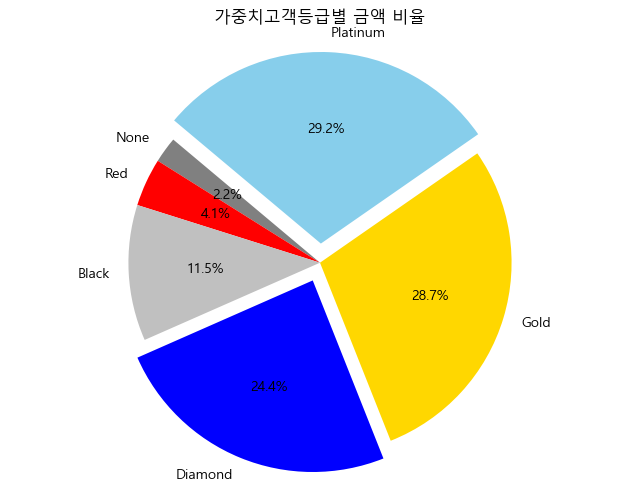

In [44]:
grade_counts = rfm_data.groupby('가중치고객등급')['Moneytary'].sum().sort_values() / rfm_data['Moneytary'].sum()*100
labels = grade_counts.index
sizes = grade_counts.values

colors = ['gray', 'Red', 'silver', 'blue', 'gold', 'skyblue']
explode = (0, 0, 0, 0.1, 0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('가중치고객등급별 금액 비율')
plt.axis('equal')
plt.show()

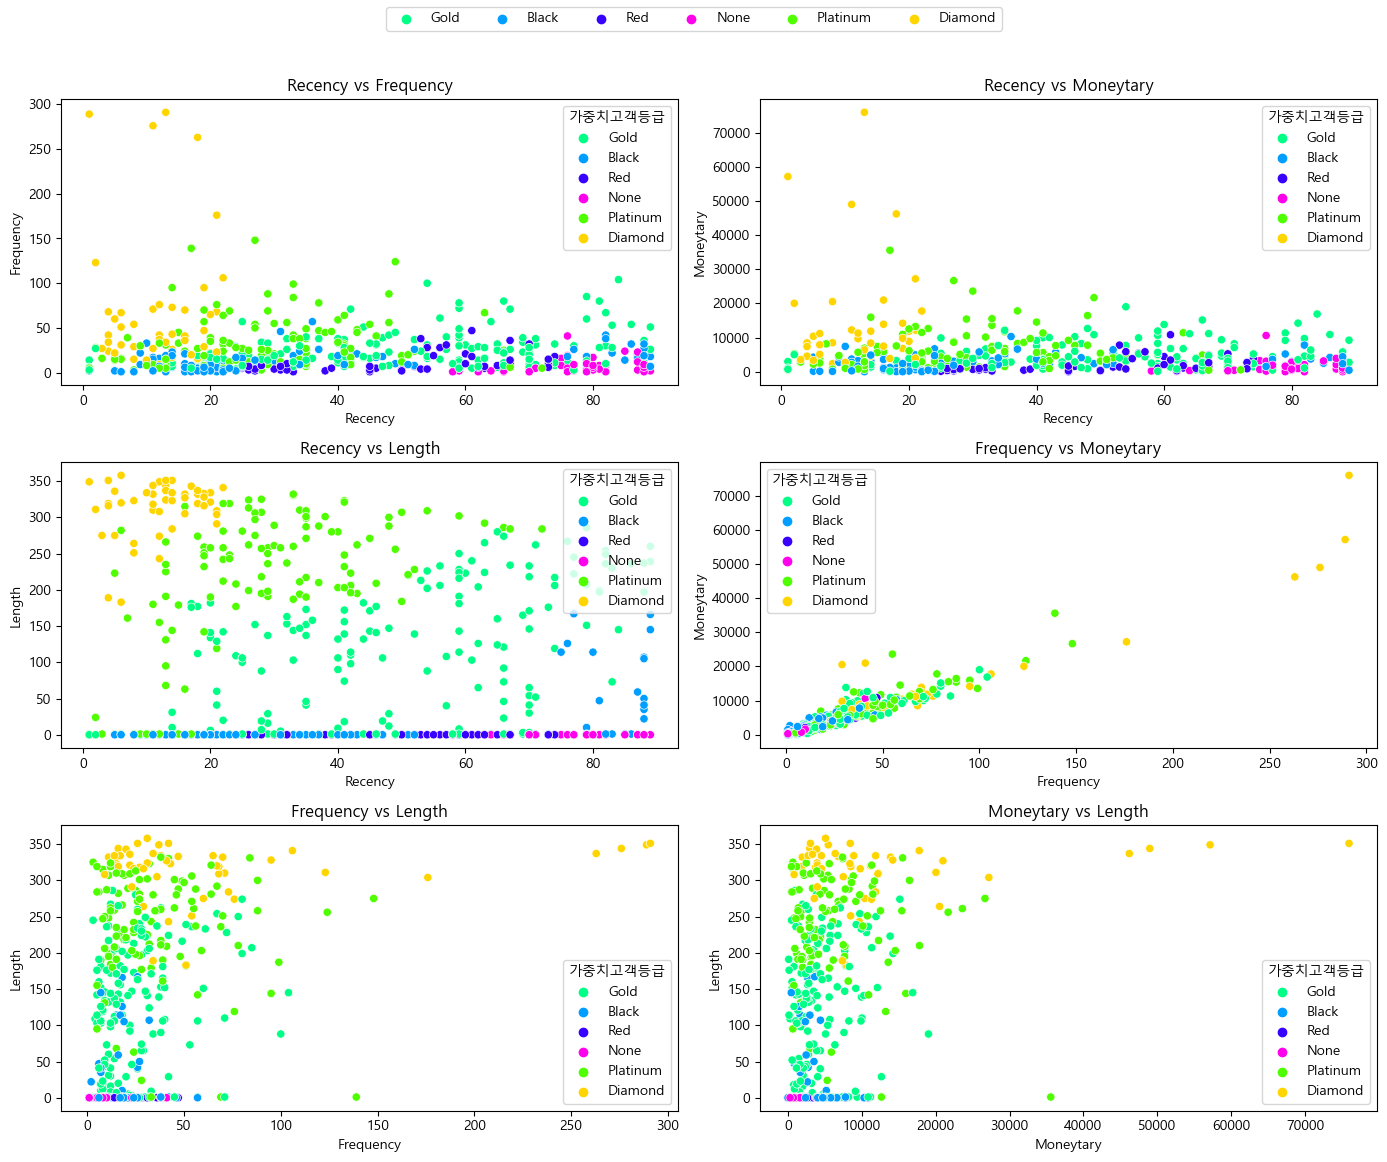

In [57]:
unique_grades = rfm_data['가중치고객등급'].unique()
grade_order = ['Diamond', 'Platinum', 'Gold', 'Black', 'Red', 'None']
palette = sns.color_palette("hsv", len(unique_grades))

color_mapping = {grade: color for grade, color in zip(grade_order, palette)}

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# R_Score vs F_Score
sns.scatterplot(ax=axes[0, 0], x='Recency', y='Frequency', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 0].set_title('Recency vs Frequency')

# R_Score vs M_Score
sns.scatterplot(ax=axes[0, 1], x='Recency', y='Moneytary', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 1].set_title('Recency vs Moneytary')

# R_Score vs L_Score
sns.scatterplot(ax=axes[1, 0], x='Recency', y='Length', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 0].set_title('Recency vs Length')

# F_Score vs M_Score
sns.scatterplot(ax=axes[1, 1], x='Frequency', y='Moneytary', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 1].set_title('Frequency vs Moneytary')

sns.scatterplot(ax=axes[2, 0], x='Frequency', y='Length', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 0].set_title('Frequency vs Length')

# Monetary vs Length
sns.scatterplot(ax=axes[2, 1], x='Moneytary', y='Length', data=rfm_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 1].set_title('Moneytary vs Length')


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(rfm_data['가중치고객등급'].unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

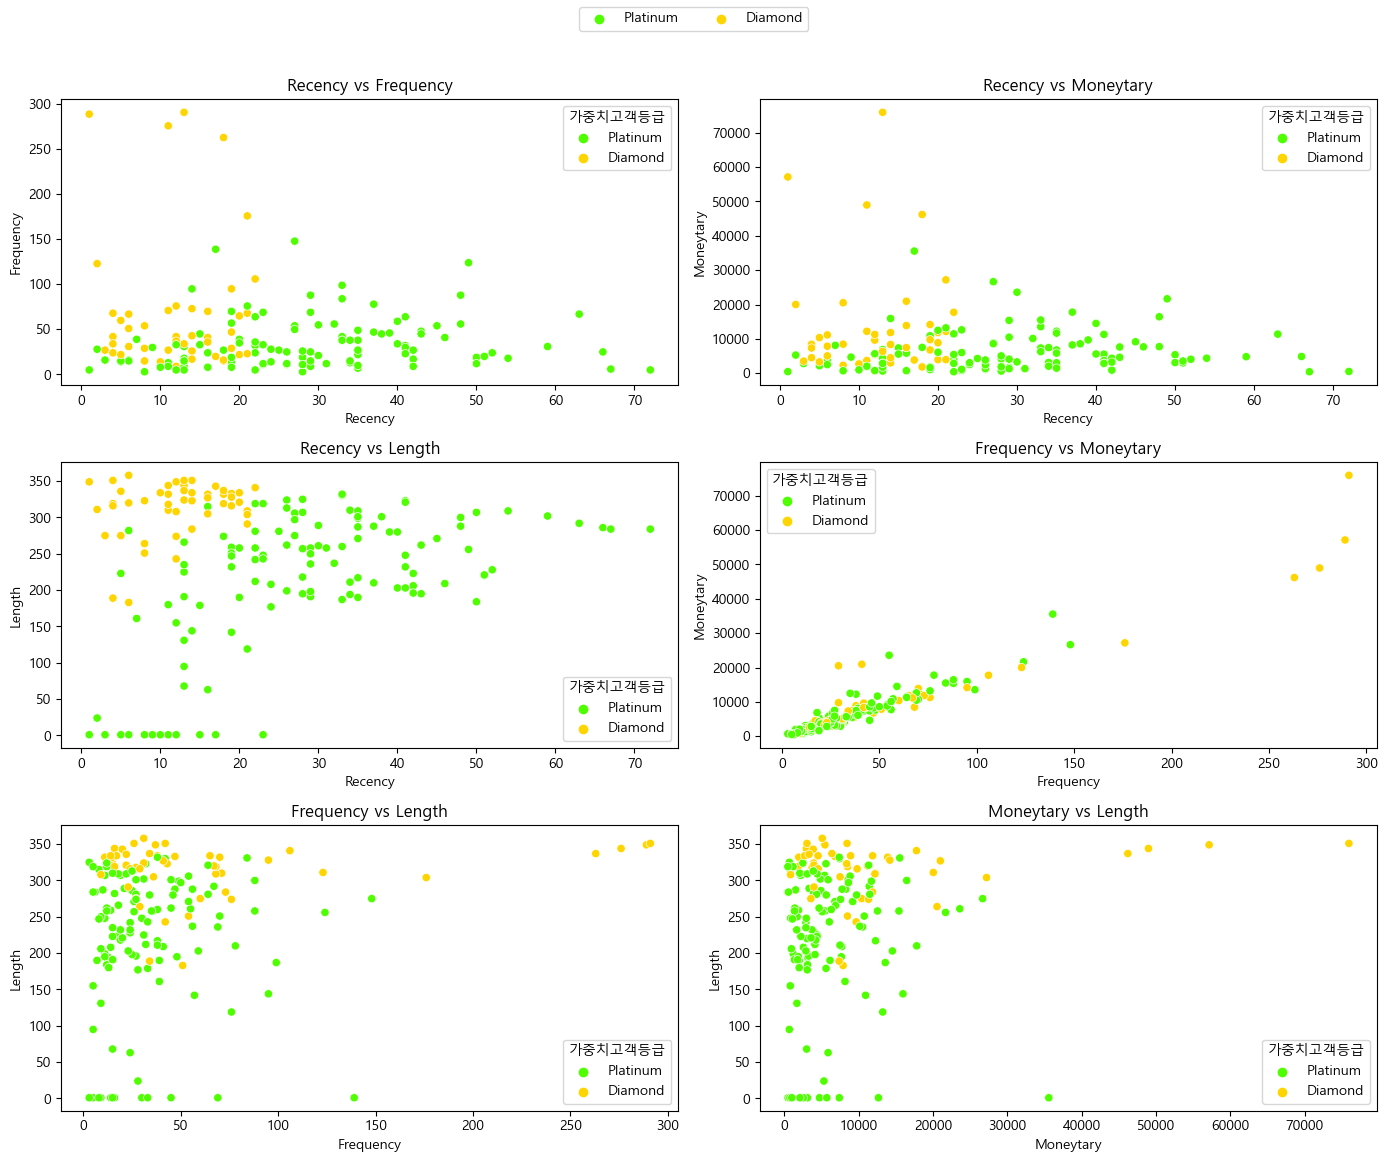

In [58]:
diamond_platinum_data = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond', 'Platinum'])]

palette_restricted = {grade: color for grade, color in color_mapping.items() if grade in ['Diamond', 'Platinum']}

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# R_Score vs F_Score
sns.scatterplot(ax=axes[0, 0], x='Recency', y='Frequency', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 0].set_title('Recency vs Frequency')

# R_Score vs M_Score
sns.scatterplot(ax=axes[0, 1], x='Recency', y='Moneytary', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[0, 1].set_title('Recency vs Moneytary')

# R_Score vs L_Score
sns.scatterplot(ax=axes[1, 0], x='Recency', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 0].set_title('Recency vs Length')

# F_Score vs M_Score
sns.scatterplot(ax=axes[1, 1], x='Frequency', y='Moneytary', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[1, 1].set_title('Frequency vs Moneytary')

sns.scatterplot(ax=axes[2, 0], x='Frequency', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 0].set_title('Frequency vs Length')

# Monetary vs Length
sns.scatterplot(ax=axes[2, 1], x='Moneytary', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes[2, 1].set_title('Moneytary vs Length')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(diamond_platinum_data['가중치고객등급'].unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

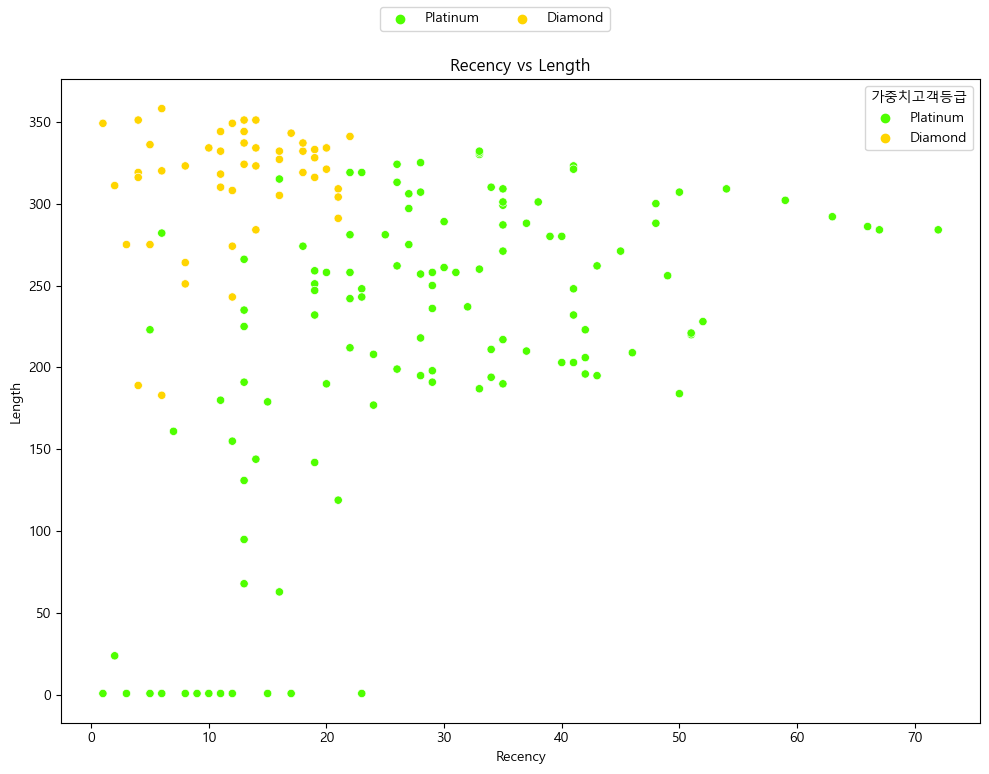

In [59]:
diamond_platinum_data = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond', 'Platinum'])]

palette_restricted = {grade: color for grade, color in color_mapping.items() if grade in ['Diamond', 'Platinum']}

fig, axes = plt.subplots(figsize=(10, 8))

# R_Score vs L_Score
sns.scatterplot(ax=axes, x='Recency', y='Length', data=diamond_platinum_data, hue='가중치고객등급', palette=color_mapping)
axes.set_title('Recency vs Length')


handles, labels = axes.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(diamond_platinum_data['가중치고객등급'].unique()))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Vip: rfml >=5

vip이탈: fml>=4, r<=3

충성고객: rfml>=4

충성예정고객: rfml>=3

충성이탈예정고객: fl>=3, r<=2

나머지

In [60]:
import pandas as pd

grade_combinations = rfm_data.groupby(['고객등급', '가중치고객등급']).size().reset_index(name='Count')

grade_combinations_sorted = grade_combinations.sort_values(by='가중치고객등급', ascending=False)

print(grade_combinations_sorted)

        고객등급   가중치고객등급  Count
9       일반고객       Red     51
8       일반고객  Platinum      7
15    충성예정고객  Platinum     16
12      충성고객  Platinum     34
1        VIP  Platinum      1
18  충성이탈예정고객  Platinum      1
4    VIP이탈고객  Platinum     58
7       일반고객      None     43
6       일반고객      Gold     12
11      충성고객      Gold      9
3    VIP이탈고객      Gold    105
14    충성예정고객      Gold     15
17  충성이탈예정고객      Gold     19
10      충성고객   Diamond     30
13    충성예정고객   Diamond      1
0        VIP   Diamond     18
5       일반고객     Black     93
2    VIP이탈고객     Black     15
16  충성이탈예정고객     Black      7


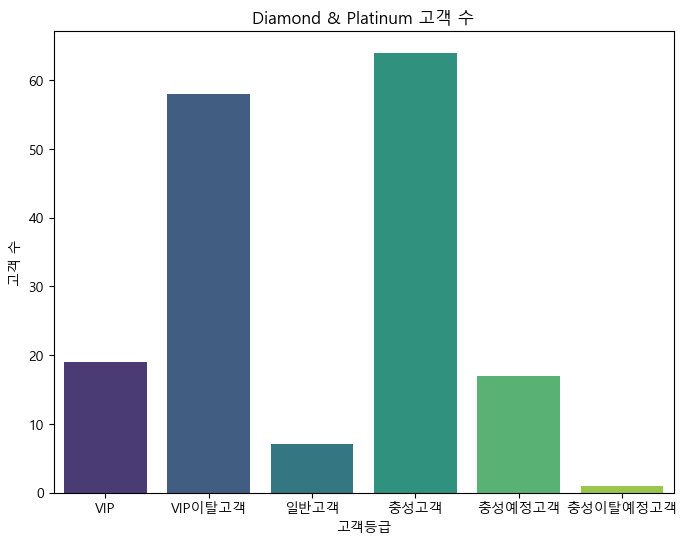

In [61]:
filtered_data = rfm_data[rfm_data['가중치고객등급'].isin(['Diamond', 'Platinum'])]

aggregated_data = filtered_data.groupby('고객등급').size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
sns.barplot(x='고객등급', y='Count', data=aggregated_data, palette='viridis')
plt.title('Diamond & Platinum 고객 수')
plt.xlabel('고객등급')
plt.ylabel('고객 수')
plt.show()

In [62]:
aggregated_data

,고객등급,Count
0,VIP,19
1,VIP이탈고객,58
2,일반고객,7
3,충성고객,64
4,충성예정고객,17
5,충성이탈예정고객,1


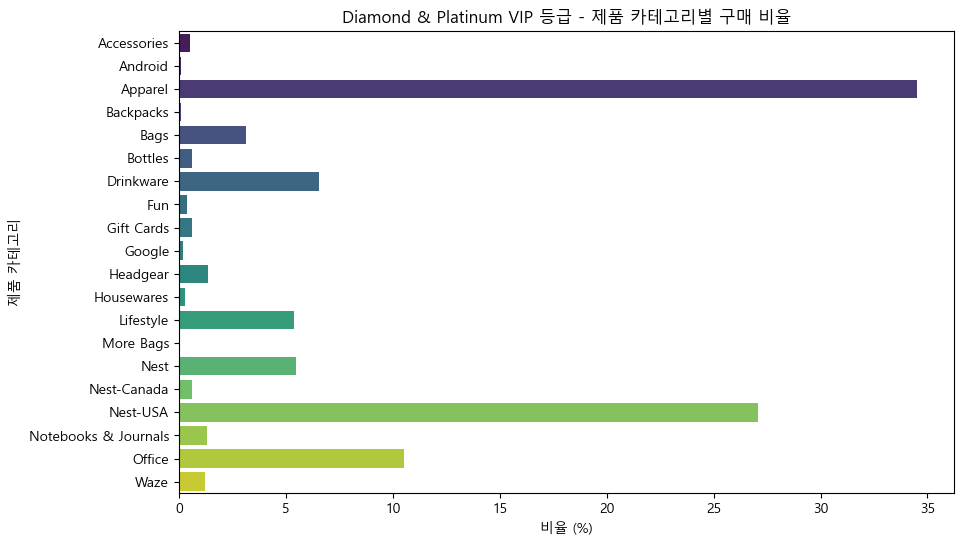

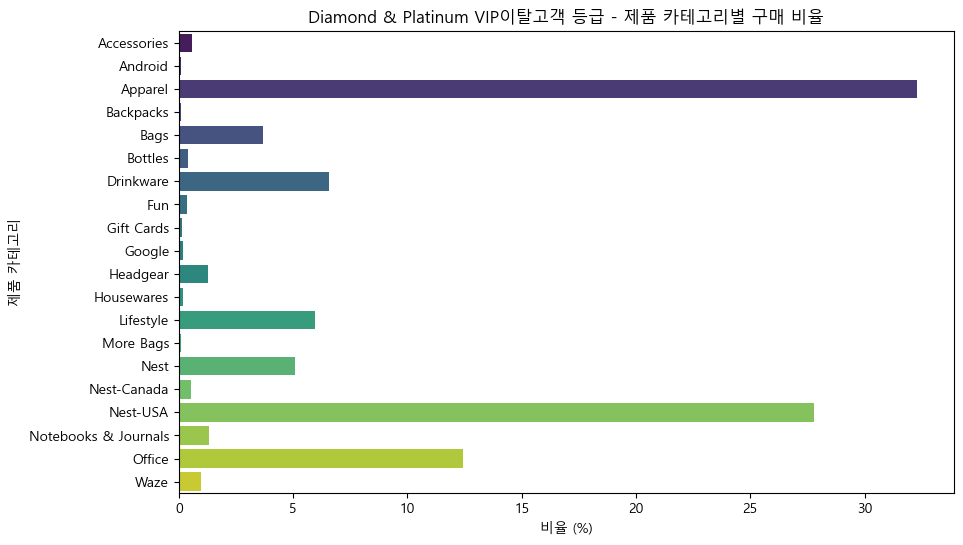

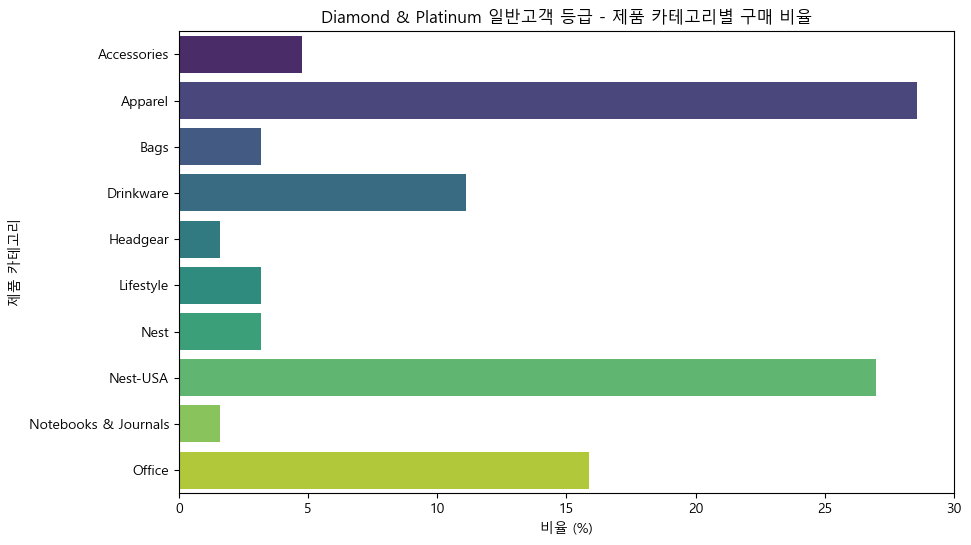

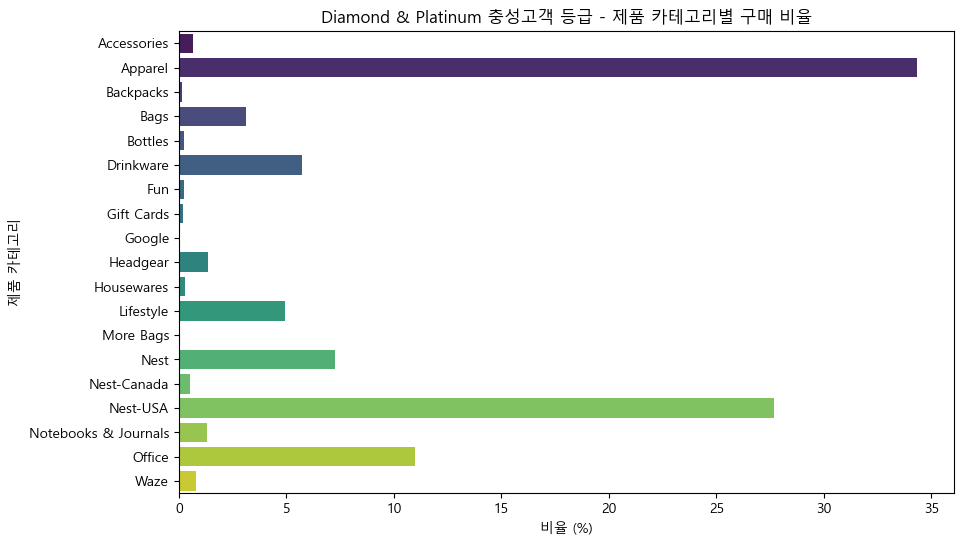

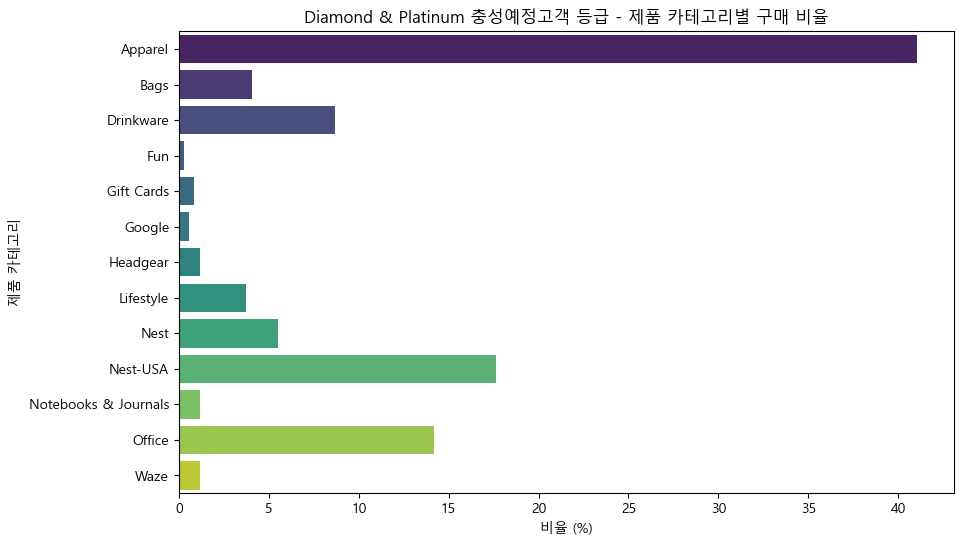

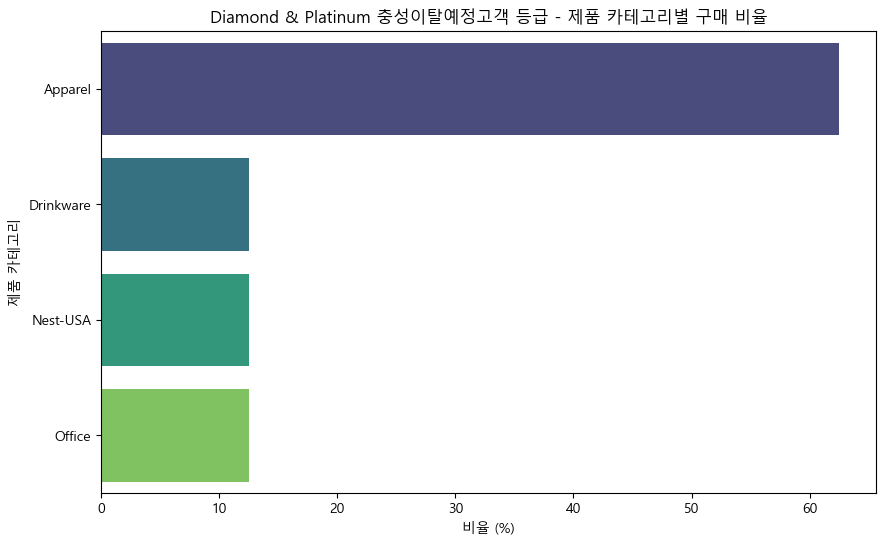

In [64]:
# 등급별로 제품 카테고리 구매 비율 
combined_data = pd.merge(onlinesales_data, filtered_data[['고객ID', '고객등급']], on='고객ID', how='inner')

category_ratio_by_grade = combined_data.groupby(['고객등급', '제품카테고리']).size()
category_ratio_by_grade = category_ratio_by_grade / category_ratio_by_grade.groupby(level=0).sum() * 100
category_ratio_by_grade = category_ratio_by_grade.reset_index(name='비율')
grades = category_ratio_by_grade['고객등급'].unique()

for grade in grades:
    plt.figure(figsize=(10, 6))
    grade_data = category_ratio_by_grade[category_ratio_by_grade['고객등급'] == grade]
    sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
    plt.title(f'Diamond & Platinum {grade} 등급 - 제품 카테고리별 구매 비율')
    plt.xlabel('비율 (%)')
    plt.ylabel('제품 카테고리')
    plt.show()

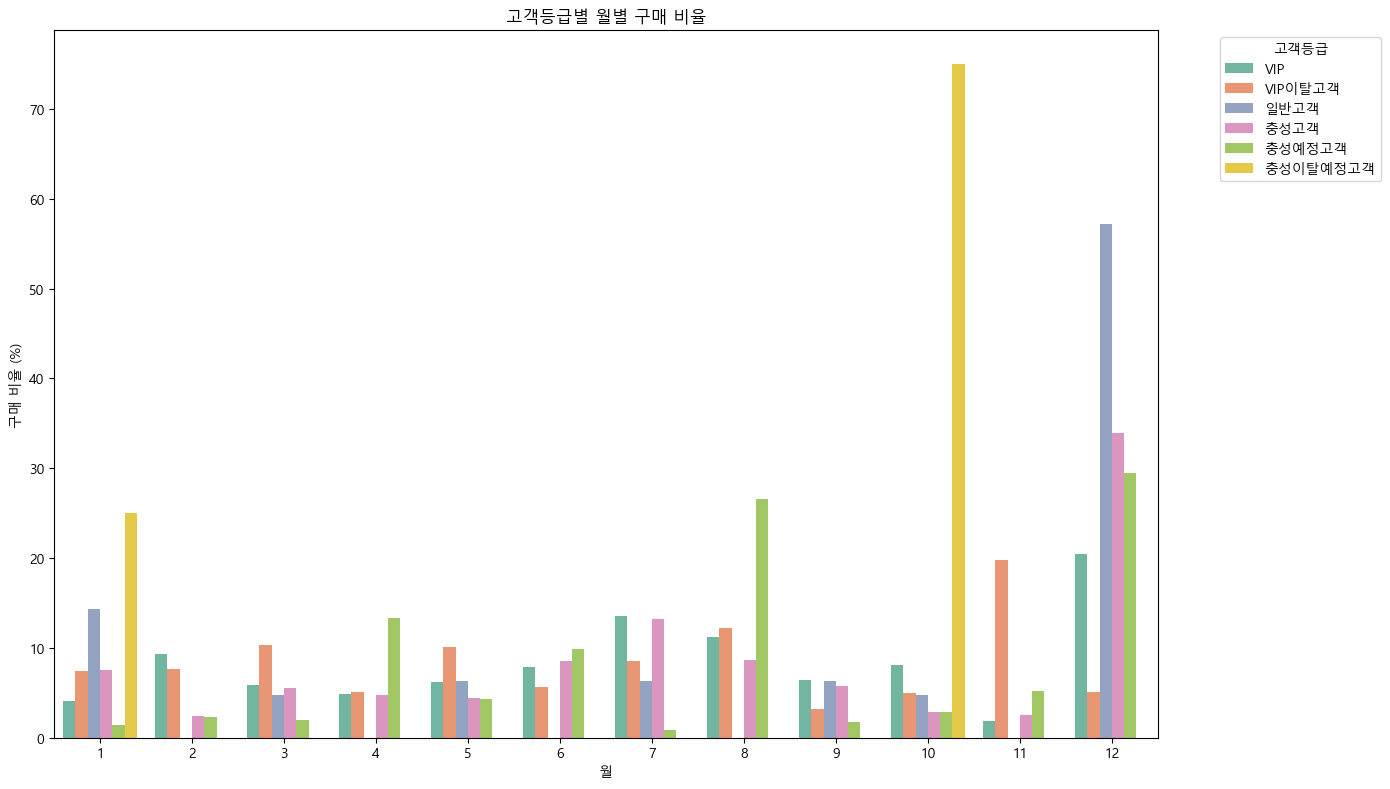

In [65]:
# Diamond & Platinum 에 해당하는 고객 등급별로 월별 구매비율
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_data['거래날짜'] = pd.to_datetime(combined_data['거래날짜'])

combined_data['월'] = combined_data['거래날짜'].dt.month

monthly_purchase_ratio = combined_data.groupby(['고객등급', '월']).size()
monthly_purchase_ratio = monthly_purchase_ratio / monthly_purchase_ratio.groupby(level=0).sum() * 100
monthly_purchase_ratio = monthly_purchase_ratio.reset_index(name='비율')

plt.figure(figsize=(14, 8))
sns.barplot(x='월', y='비율', hue='고객등급', data=monthly_purchase_ratio, palette='Set2')
plt.title('고객등급별 월별 구매 비율')
plt.xlabel('월')
plt.ylabel('구매 비율 (%)')
plt.legend(title='고객등급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

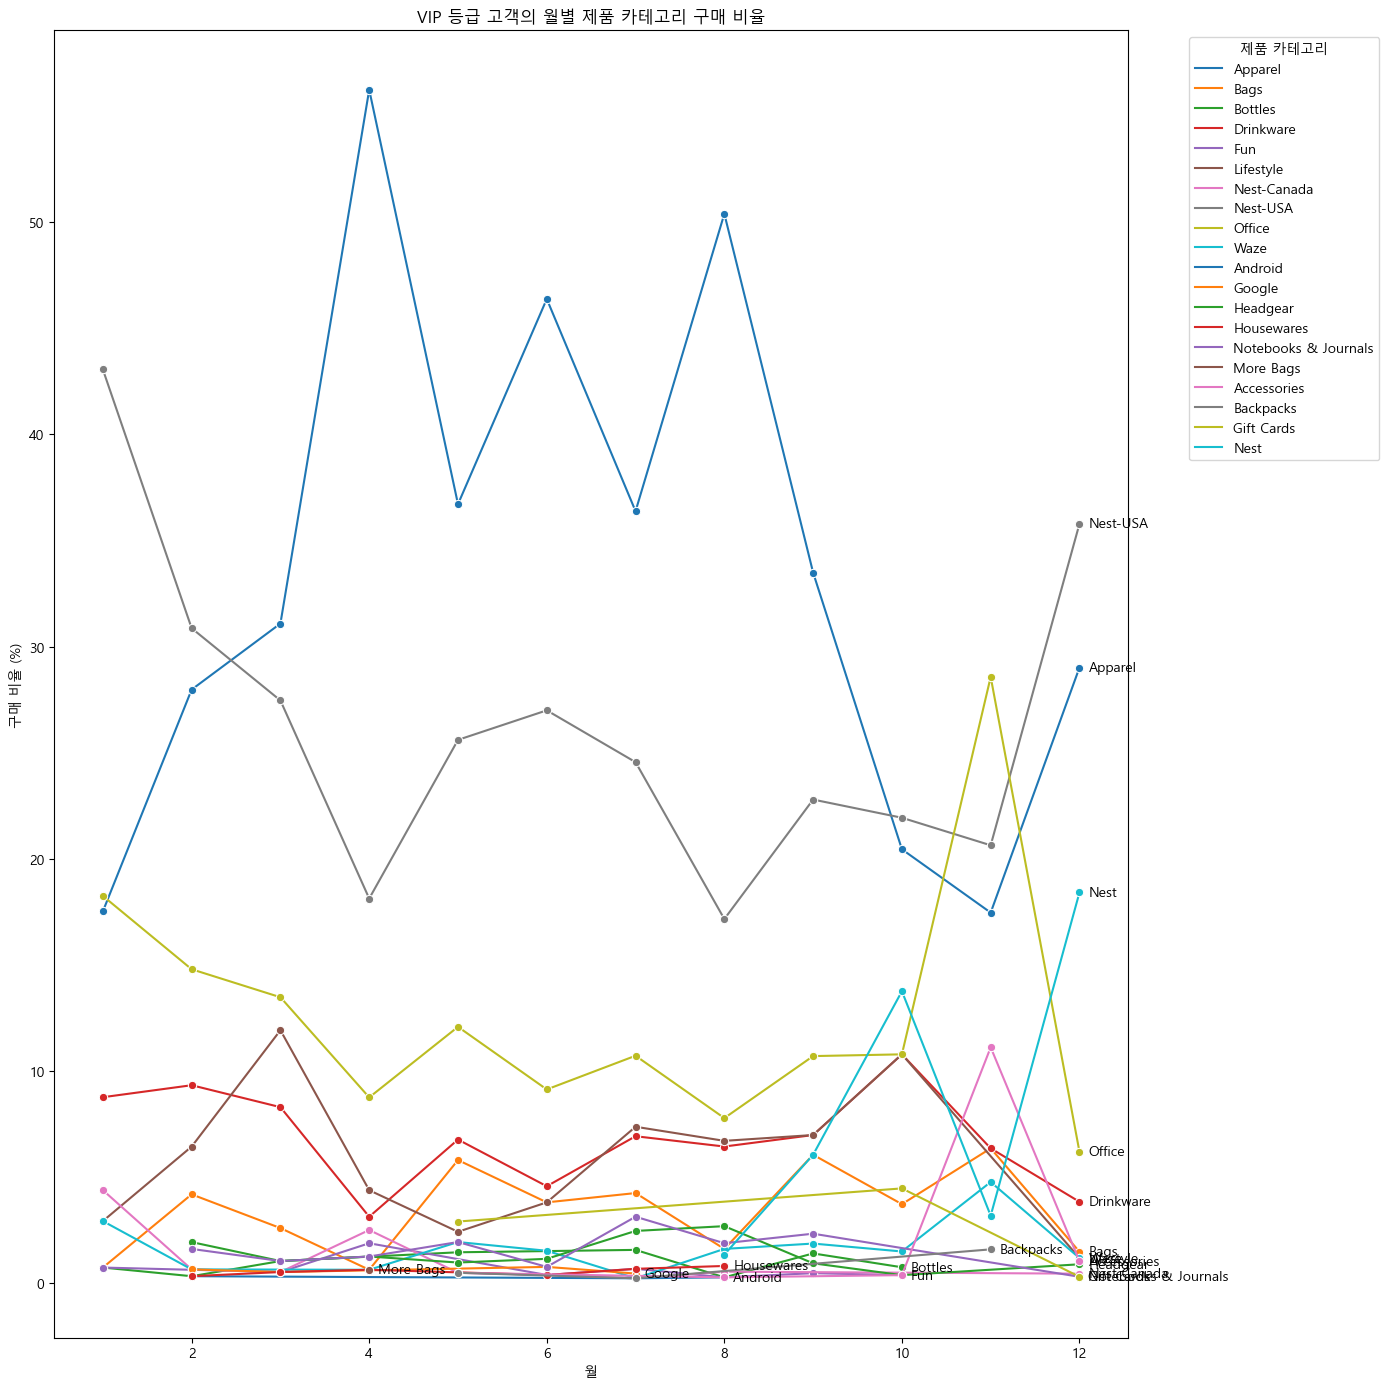

In [68]:
vip_data = combined_data[combined_data['고객등급'] == 'VIP']

vip_monthly_category_ratio = vip_data.groupby(['월', '제품카테고리']).size()
vip_monthly_category_ratio = vip_monthly_category_ratio / vip_monthly_category_ratio.groupby(level=0).sum() * 100
vip_monthly_category_ratio = vip_monthly_category_ratio.reset_index(name='비율')

plt.figure(figsize=(14, 14))
sns.lineplot(x='월', y='비율', hue='제품카테고리', data=vip_monthly_category_ratio, marker='o', palette='tab10')

categories = vip_monthly_category_ratio['제품카테고리'].unique()
for category in categories:
    df_category = vip_monthly_category_ratio[vip_monthly_category_ratio['제품카테고리'] == category]
    last_point = df_category.iloc[-1]
    plt.text(last_point['월'] + 0.1, last_point['비율'], category, verticalalignment='center')

plt.title('VIP 등급 고객의 월별 제품 카테고리 구매 비율')
plt.xlabel('월')
plt.ylabel('구매 비율 (%)')
plt.legend(title='제품 카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

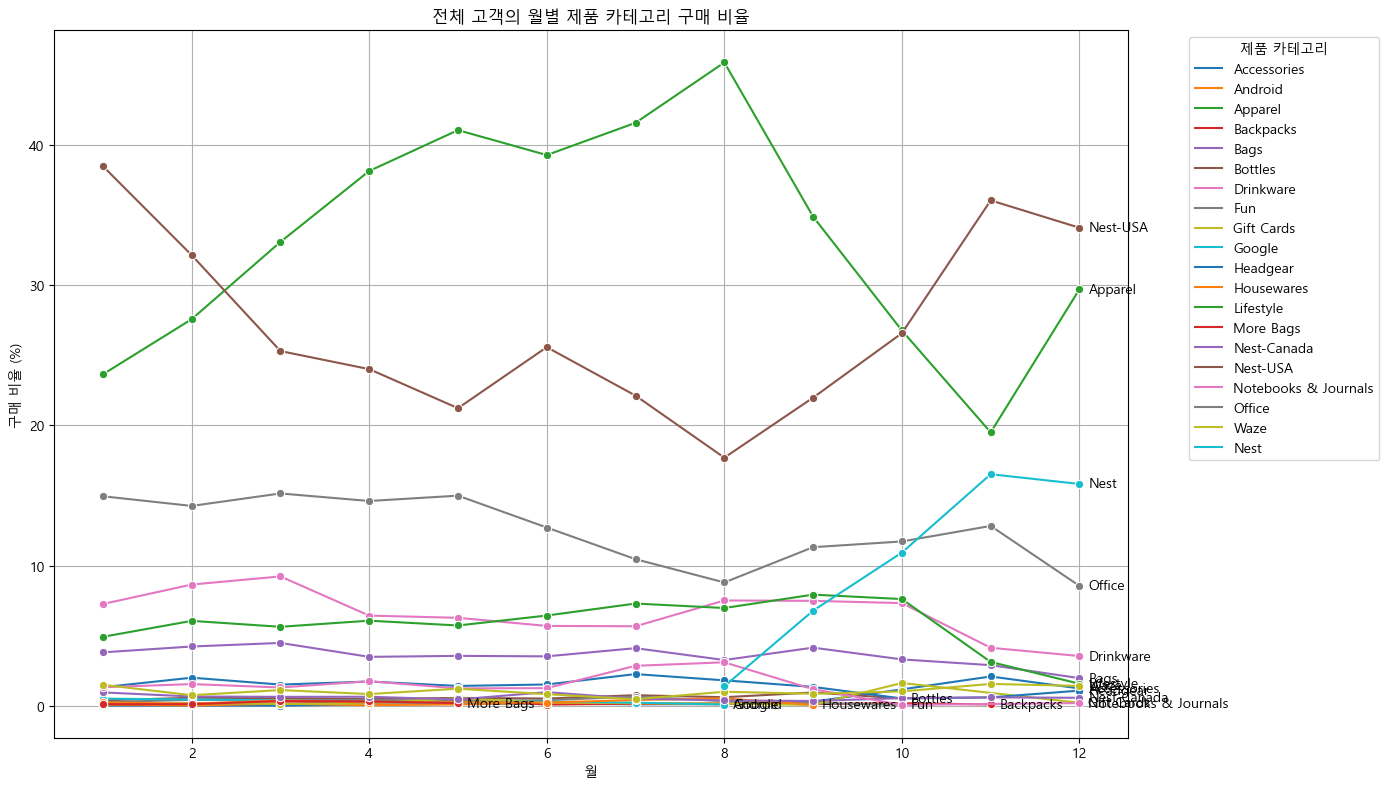

In [69]:
tt=onlinesales_data.copy()
tt['거래날짜'] = pd.to_datetime(tt['거래날짜'])
tt['월'] = tt['거래날짜'].dt.month

total_monthly_category_ratio = tt.groupby(['월', '제품카테고리']).size()
total_monthly_category_ratio = total_monthly_category_ratio / total_monthly_category_ratio.groupby(level=0).sum() * 100
total_monthly_category_ratio = total_monthly_category_ratio.reset_index(name='비율')
plt.figure(figsize=(14, 8))
sns.lineplot(x='월', y='비율', hue='제품카테고리', data=total_monthly_category_ratio, marker='o', palette='tab10')

categories = total_monthly_category_ratio['제품카테고리'].unique()
for category in categories:
    df_category = total_monthly_category_ratio[total_monthly_category_ratio['제품카테고리'] == category]
    last_point = df_category.iloc[-1]
    plt.text(last_point['월'] + 0.1, last_point['비율'], category, verticalalignment='center')

plt.title('전체 고객의 월별 제품 카테고리 구매 비율')
plt.xlabel('월')
plt.ylabel('구매 비율 (%)')
plt.legend(title='제품 카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

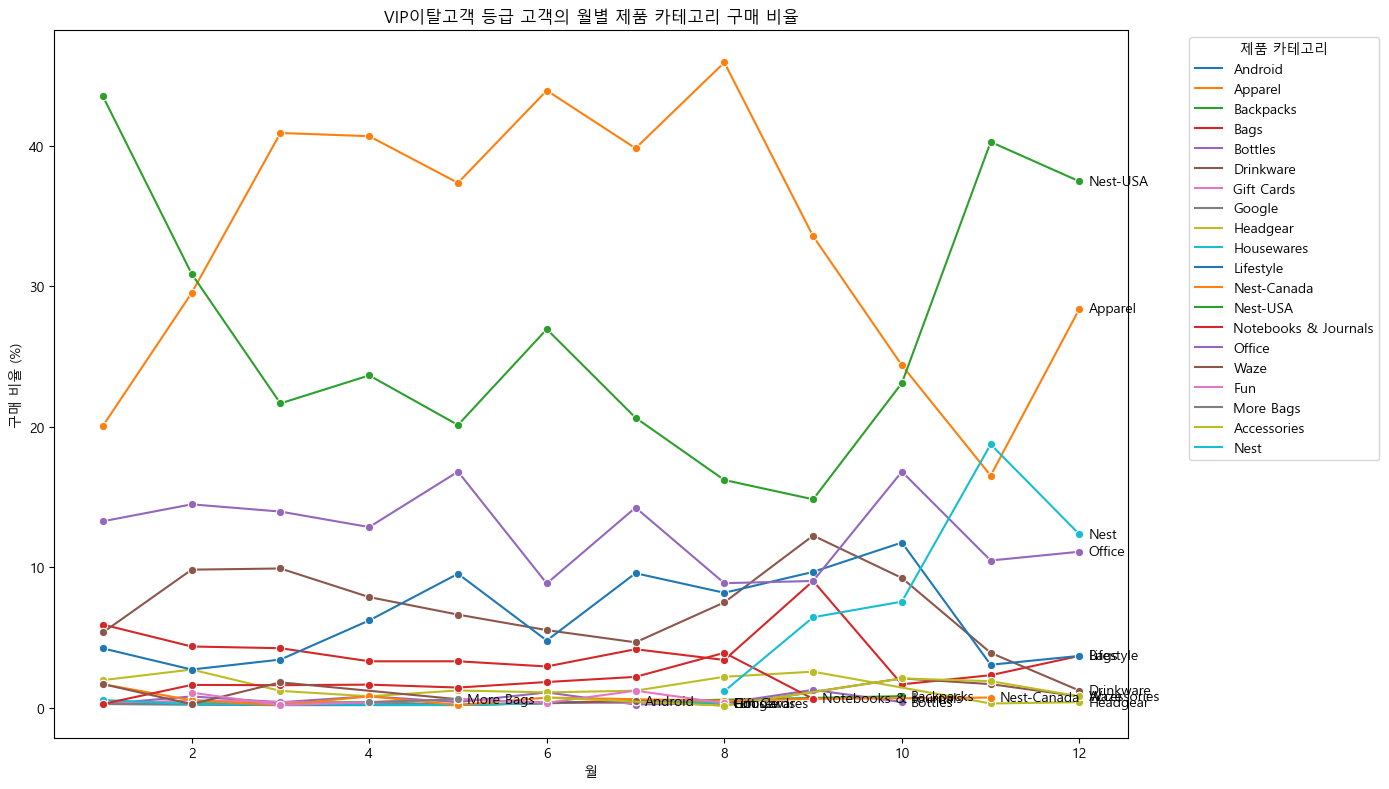

In [70]:
vip_churn_data = combined_data[combined_data['고객등급'] == 'VIP이탈고객']

vip_churn_monthly_category_ratio = vip_churn_data.groupby(['월', '제품카테고리']).size()
vip_churn_monthly_category_ratio = vip_churn_monthly_category_ratio / vip_churn_monthly_category_ratio.groupby(level=0).sum() * 100
vip_churn_monthly_category_ratio = vip_churn_monthly_category_ratio.reset_index(name='비율')

plt.figure(figsize=(14, 8))
sns.lineplot(x='월', y='비율', hue='제품카테고리', data=vip_churn_monthly_category_ratio, marker='o', palette='tab10')

categories = vip_churn_monthly_category_ratio['제품카테고리'].unique()
for category in categories:
    df_category = vip_churn_monthly_category_ratio[vip_churn_monthly_category_ratio['제품카테고리'] == category]
    last_point = df_category.iloc[-1]
    plt.text(last_point['월'] + 0.1, last_point['비율'], category, verticalalignment='center')

plt.title('VIP이탈고객 등급 고객의 월별 제품 카테고리 구매 비율')
plt.xlabel('월')
plt.ylabel('구매 비율 (%)')
plt.legend(title='제품 카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

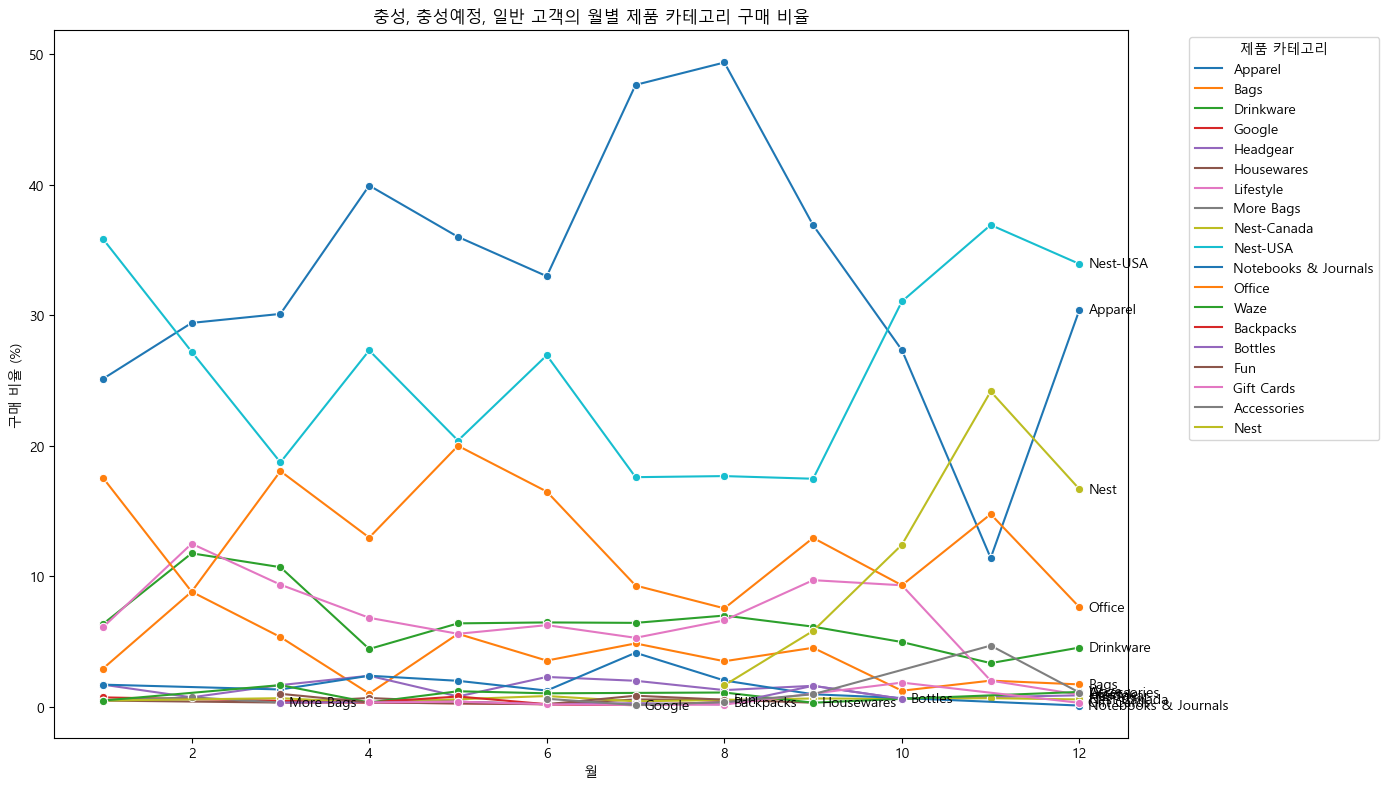

In [71]:
loyalty_data = combined_data[combined_data['고객등급'].isin(['충성고객', '충성예정고객', '일반고객'])]

loyalty_monthly_category_ratio = loyalty_data.groupby(['월', '제품카테고리']).size()
loyalty_monthly_category_ratio = loyalty_monthly_category_ratio / loyalty_monthly_category_ratio.groupby(level=0).sum() * 100
loyalty_monthly_category_ratio = loyalty_monthly_category_ratio.reset_index(name='비율')

plt.figure(figsize=(14, 8))
sns.lineplot(x='월', y='비율', hue='제품카테고리', data=loyalty_monthly_category_ratio, marker='o', palette='tab10')

categories = loyalty_monthly_category_ratio['제품카테고리'].unique()
for category in categories:
    df_category = loyalty_monthly_category_ratio[loyalty_monthly_category_ratio['제품카테고리'] == category]
    last_point = df_category.iloc[-1]
    plt.text(last_point['월'] + 0.1, last_point['비율'], category, verticalalignment='center')

plt.title('충성, 충성예정, 일반 고객의 월별 제품 카테고리 구매 비율')
plt.xlabel('월')
plt.ylabel('구매 비율 (%)')
plt.legend(title='제품 카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()